#Sentiment Analysis for Movie reviews

In [21]:
pd.read_csv('/content/new1.csv')

,Review
0,I thought this was a wonderful way to spend ti...
1,"Probably my all-time favorite movie, a story o..."
2,I sure would like to see a resurrection of a u...
3,"This show was an amazing, fresh & innovative i..."
4,Encouraged by the positive comments about this...


In [13]:
pip install pandas nltk

In [22]:
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Read the data from the CSV file
df = pd.read_csv('/content/new1.csv')

# Sample product reviews from the DataFrame
reviews = df['Review'].tolist()

# Convert reviews to lowercase
reviews_lower = [review.lower() for review in reviews]

# Define the stopwords and punctuation to be removed
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

# Preprocess the reviews: Removing special characters and stopwords
preprocessed_reviews = []
for review in reviews_lower:
    # Remove special characters using the translator
    review_cleaned = review.translate(translator)

    # Tokenize the review
    tokens = nltk.word_tokenize(review_cleaned)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Join the filtered tokens back into a sentence
    preprocessed_review = ' '.join(filtered_tokens)

    # Append the preprocessed review to the list
    preprocessed_reviews.append(preprocessed_review)

# Display the preprocessed reviews
for idx, review in enumerate(preprocessed_reviews, 1):
    print(f"Preprocessed Review {idx}: {review}")


Preprocessed Review 1: thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many us grown lovebr br id laughed one woodys comedies years dare say decade ive never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanbr br may crown jewel career wittier devil wears prada interesting superman great comedy go see friends
Preprocessed Review 2: probably alltime favorite movie story selflessness sacrifice dedication noble cause preachy boring never gets old despite seen 15 times last 25 years paul lukas performance brings tears eyes bette davis one truly sympathetic roles delight kids grandma says like dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believa

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
# Sample star ratings (sentiment labels)
star_ratings = [5, 1, 5, 1,4]

# Convert star ratings to binary sentiment labels (positive or negative) using a threshold
# For example, we can consider ratings >= 3 as positive and ratings < 3 as negative
threshold = 3
binary_labels = [1 if rating >= threshold else 0 for rating in star_ratings]

# Add the binary sentiment labels to the DataFrame
df['Sentiment'] = binary_labels

# Save the updated DataFrame to a new CSV file
df.to_csv('/content/new1.csv', index=False)

print("Sentiment labels added and saved to '/content/new1.csv.")


Sentiment labels added and saved to '/content/new1.csv.


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the data from the CSV file (if not already done)
df = pd.read_csv('/content/new1.csv')

# Split the data into features (preprocessed reviews) and target (sentiment labels)
X = df['Review'].values
y = df['Sentiment'].values

# Create a CountVectorizer to convert text data into numerical vectors
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Confusion Matrix:
[[0 1]
 [0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [28]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Function to perform data preprocessing on a new review
def preprocess_review(review):
    # Convert review to lowercase
    review_lower = review.lower()

    # Define the stopwords and punctuation to be removed
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)

    # Remove special characters using the translator
    review_cleaned = review_lower.translate(translator)

    # Tokenize the review
    tokens = nltk.word_tokenize(review_cleaned)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Join the filtered tokens back into a sentence
    preprocessed_review = ' '.join(filtered_tokens)

    return preprocessed_review

# Function to perform sentiment analysis on a new review using the trained model
def perform_sentiment_analysis(review):
    # Preprocess the new review
    preprocessed_review = preprocess_review(review)

    # Convert the preprocessed review into a numerical vector using the same vectorizer
    new_review_vectorized = vectorizer.transform([preprocessed_review])

    # Predict the sentiment using the trained classifier
    prediction = classifier.predict(new_review_vectorized)[0]

    # Return sentiment label
    return "Positive" if prediction == 1 else "Negative"

# Test the sentiment analysis function on a new review
new_review = "This movie is bad! I dont recommend it."
sentiment = perform_sentiment_analysis(new_review)
print("Sentiment:", sentiment)


Sentiment: Negative


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
pip install matplotlib seaborn pandas

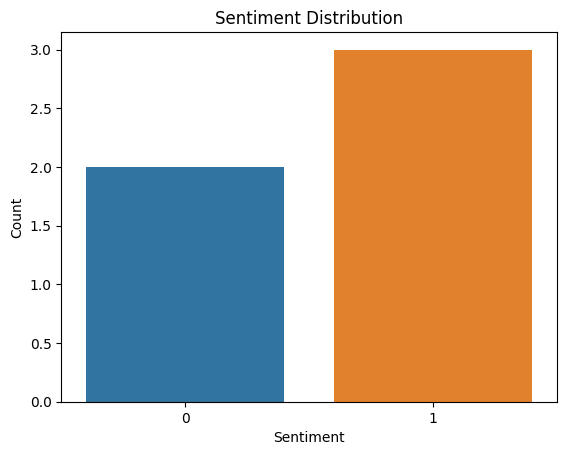

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Confusion Matrix:
[[1]]


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the data from the CSV file (if not already done)
df = pd.read_csv('/content/new1.csv')

# Display the distribution of sentiments
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Sample product reviews from the DataFrame
reviews = df['Review'].tolist()

# Convert reviews to lowercase
reviews_lower = [review.lower() for review in reviews]

# Define the stopwords and punctuation to be removed (if not already defined)
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

# Preprocess the reviews: Removing special characters and stopwords (if not already done)
preprocessed_reviews = []
for review in reviews_lower:
    review_cleaned = review.translate(translator)
    tokens = nltk.word_tokenize(review_cleaned)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_review = ' '.join(filtered_tokens)
    preprocessed_reviews.append(preprocessed_review)

# Convert preprocessed_reviews into numerical vectors using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(preprocessed_reviews)

# Split the data into features (X) and target (y)
X = X_vectorized
y = df['Sentiment'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [31]:
import pandas as pd

# Sample product reviews from the CSV file (product_reviews.csv)
reviews_df = pd.read_csv('/content/new1.csv')
reviews = reviews_df['Review'].tolist()

# Sample sentiment labels (0 for negative, 1 for positive)
sentiment_labels = [1, 0, 1, 0, 1]

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Review': reviews, 'Sentiment': sentiment_labels})

# Save the DataFrame to a CSV file
results_df.to_csv('sentiment_analysis_results.csv', index=False)

print("Sentiment analysis results saved to 'sentiment_analysis_results.csv'.")

Sentiment analysis results saved to 'sentiment_analysis_results.csv'.
